### BLM19432E Introduction to Data Science Final Project

Name Surname: Üveys Saraç <br>
Dataset definition:	Features of mushrooms and whether they are poisonous or not  <br>
Dataset source (web address): https://www.kaggle.com/datasets/uciml/mushroom-classification <br>
Aim of the project:	Classification of mushrooms are edible or not

# Step0: Project Proposal – 10p 



a)	Find your project data on Kaggle, UCI etc.

In [1]:
### Section a
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

data=pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


b)	Explain why you have chosen to work on this data set?

In [2]:
## Section b
## It is important to correctly classify whether mushrooms are poisonous or not.
## If misclassified, it can cause damage to the person who consumes the mushroom and even cause death if left untreated.

c)	Do basic exploratory data analysis (EDA) to understand your data.

In [3]:
### Section c
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
print("Dataset shape:", data.shape)

Dataset shape: (8124, 23)


In [5]:
data.describe() ## Some information about instances.

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
data.isnull().sum() ## Check null values.

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

C:\Users\Üveys SARAÇ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


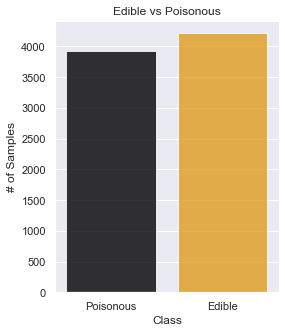

In [7]:
#Comparing instances whether Edible or Poisonous
sns.set_style("darkgrid")
sns.set(rc={"figure.figsize":(4,5)})
plt.figure()
fig1=sns.countplot(data["class"], alpha=.80, palette=["black","orange"])
plt.title("Edible vs Poisonous")
plt.ylabel("# of Samples")
plt.xlabel("Class")
fig1.set(xticklabels=["Poisonous","Edible"])
plt.show()

In [8]:
print("Unique number of each columns of data :\n",data.nunique(axis=0))

Unique number of each columns of data :
 class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64


In [9]:
data.isna().sample(10)
#10 rastgele verinin içinde nan değer olup olmadığının tablosu (False = Not na, True = na value)
#Gelen rastgele değerler arasında hiç nan değer olan yoktur
#Yukarıdaki data.info() fonksiyonu ile hiç non-null değerimiz olmadığını görmüştük

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7812,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5313,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3362,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2046,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5809,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2547,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
605,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6286,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7070,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
37,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
data.rename(columns={'class':'classs'}, inplace=True) #Aşağıdaki örnekte "data.class" yazınca hata veriyordu bu yüzden bu sütunun ismini değiştirdik
data.head(10)

,classs,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [11]:
ClassBydata = data.classs.value_counts()
ClassBydata[:2]

e    4208
p    3916
Name: classs, dtype: int64

In [1]:
labelencoder=LabelEncoder() #Verileri Nümerikleştirme 
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

NameError: name 'LabelEncoder' is not defined

In [13]:
data.head(10)

,classs,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,3,3


In [14]:
data = data.drop(["veil-type"],axis=1) #the column “veil-type” is 0 and not contributing to the data so we will remove it.

In [15]:
corr = data.corr()

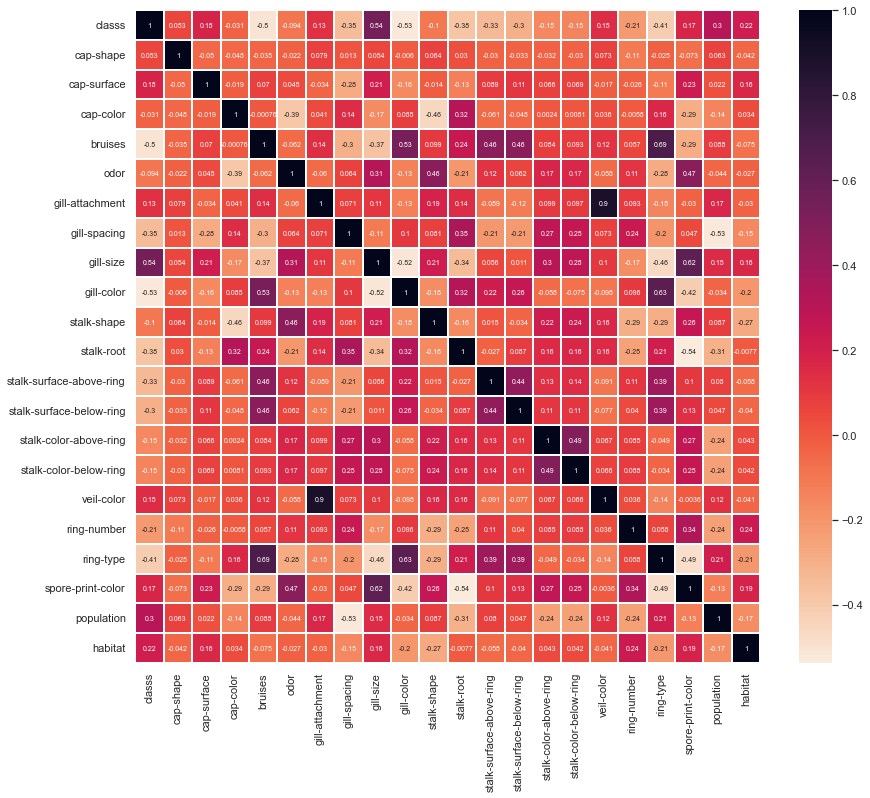

In [16]:
#Corelasyon grafiği
plt.figure(figsize=(14,12))
sns.heatmap(corr,linewidths=.1,cmap=sns.color_palette("rocket_r", as_cmap=True), annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);

d)	Briefly explain your aim. Which machine learning model do you to decide and why?

In [17]:
### Section d

#Since this is a classification problem, I think it would be appropriate to use logial Regression and naive bayes.





# STEP 1- STEP 2 - Interim Report


In [18]:
data.shape 
# Datamız 22 column ve 8124 row'dan oluşmaktadır. 
#Column sayısı bizim feature sayımıza denk gelmektedir.
#Tabii burada id name vs gibi columnları feature olarak almamamız gerekir.

(8124, 22)

In [19]:
data.info()
#Dataset ilk okunduğunda tüm column değerlerimiz object olarak geliyordu.
#Sonrasında tüm column'lara nümerikleştirme yaptığımız için artık data type'larını int olarak görmekteyiz.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   classs                    8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

In [20]:
# Tüm sütunların dağılım grafikleri
#for feature in df.columns:
#    plt.title(feature)
#    sns.countplot(df[feature])
#    plt.show()

C:\Users\Üveys SARAÇ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


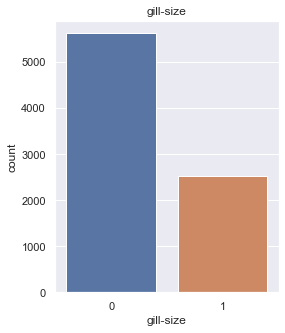

In [21]:
plt.title('gill-size')
sns.countplot(data['gill-size'])
plt.show()

# Burada gill-size değerleri ve count sayısı grafiğini görüyoruz.
# Nümerikleştirilmeyen data'da 1 = n, 0 = b'ydi.
# b = broad = geniş, n = narrow = dar değerlerine karşılık gelmektedir.
# Grafikten anlaşılacağı üzere gill-size dar olan mantarların nerdeyse 2 katı gill-size geniş mantar vardır.
# Balance değildir.

C:\Users\Üveys SARAÇ\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


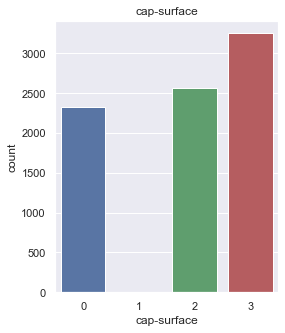

In [22]:
plt.title('cap-surface')
sns.countplot(data['cap-surface'])
plt.show()

# fibrous=f=0,grooves=g=1,scaly=y=3,smooth=s=2
# 1 değeri yani grooves olan hiç mantar yokmuş yada 0'a yakınmış.
# 0, 2 ve 3 değerlerinin birbirinden çok uzak olmadığı gözükmektedir.

In [23]:
data.isna().sum() 
# Hiç bir column'da missing value bulunmamaktadır.
# Eğer az miktarlarda missing value'lar olsaydı, missing value içeren sutünlar drop edilebilirdi.
# Eğer fazla miktarda missing value olsaydı, ortalama değer ile yada o columnlar ile korelasyonu en yüksek olan sütunlar/
# bulunup ona o sütunlardaki o değerlere göre missing valuelar ile değiştirilebilirdi. 

classs                      0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64